In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## Import the Dataset

In [2]:
import pandas as pd
import numpy as np
import io

train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', index_col=0)
print("Shape of the train dataset (Rows, Columns): ", train_df.shape)

Shape of the train dataset (Rows, Columns):  (1460, 80)


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Exploratory Data Analysis

### Descriptive Statistics

In [4]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Univariate Analysis

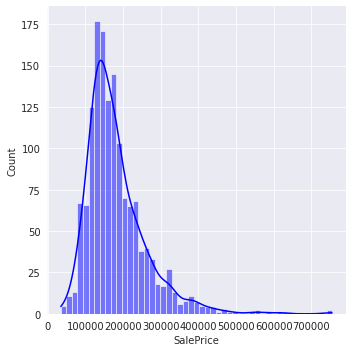

In [5]:
import seaborn as sns
sns.set_style('darkgrid')

sns.displot(train_df['SalePrice'], kde=True, color='blue')

<AxesSubplot:>

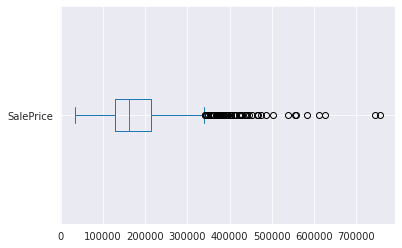

In [6]:
train_df['SalePrice'].plot(kind='box', vert=False)

### Measures of Assymetry 

|Measure|Condition|Inference|Suggested Resolution|
|---|---|---|---|
|Skewness|Positive|Peak of curve on left side|Logarithmic Transformation or Square root Transform|
|Skewness|Negative|Peak of curve on right side|Exponential Transformation or Power Transform|
|Skewness|Zero|Normal Distribution|-|
|Kurtosis|Positive (>3)|Narrow and tall peak|-|
|Kurtosis|Negative (<3)|Wide and flat peak|-|
|Kurtosis|Zero (=3)|Normal distribution|-|


In [7]:
print("Skewness: ", train_df.SalePrice.skew())
print("Kurtosis: ", train_df.SalePrice.kurtosis())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


The variable 'SalePrice' 
- is not normally distributed
- is positively skewed
- has a narrow and tall peak

<AxesSubplot:>

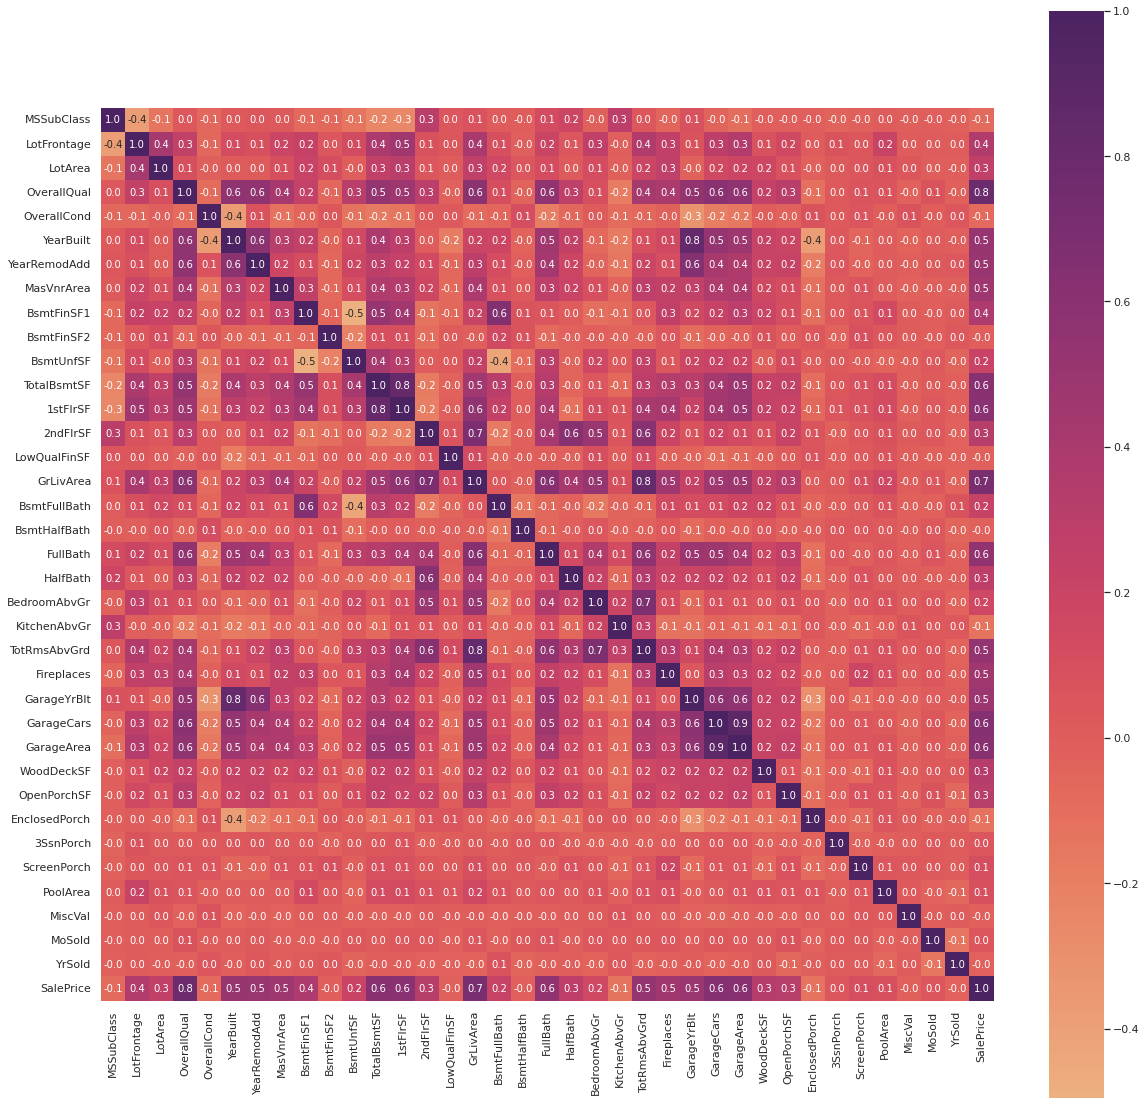

In [8]:
correlation = train_df.corr()

sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(correlation, square=True, cmap='flare', annot=True, annot_kws={'size': 10}, fmt='.1f')

- We can see that the columns like OverallQual, GrLivArea, YearBuilt and TotalBsmtSF display higher positive and negative correlations.

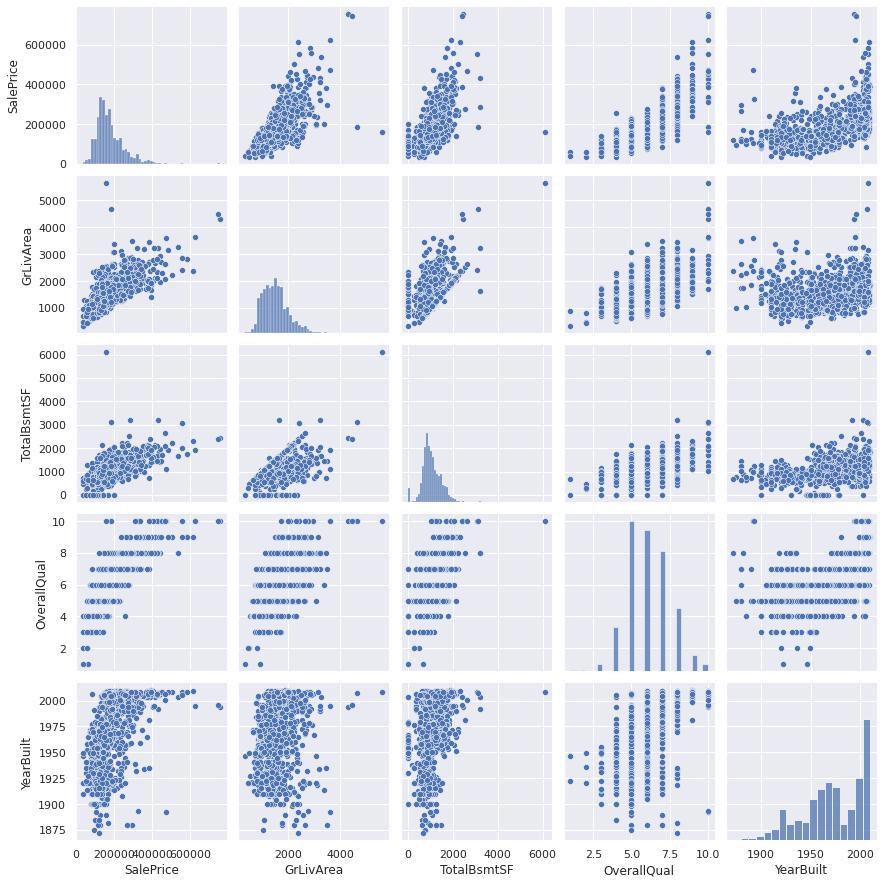

In [9]:
sns.pairplot(train_df[['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual', 'YearBuilt']])

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

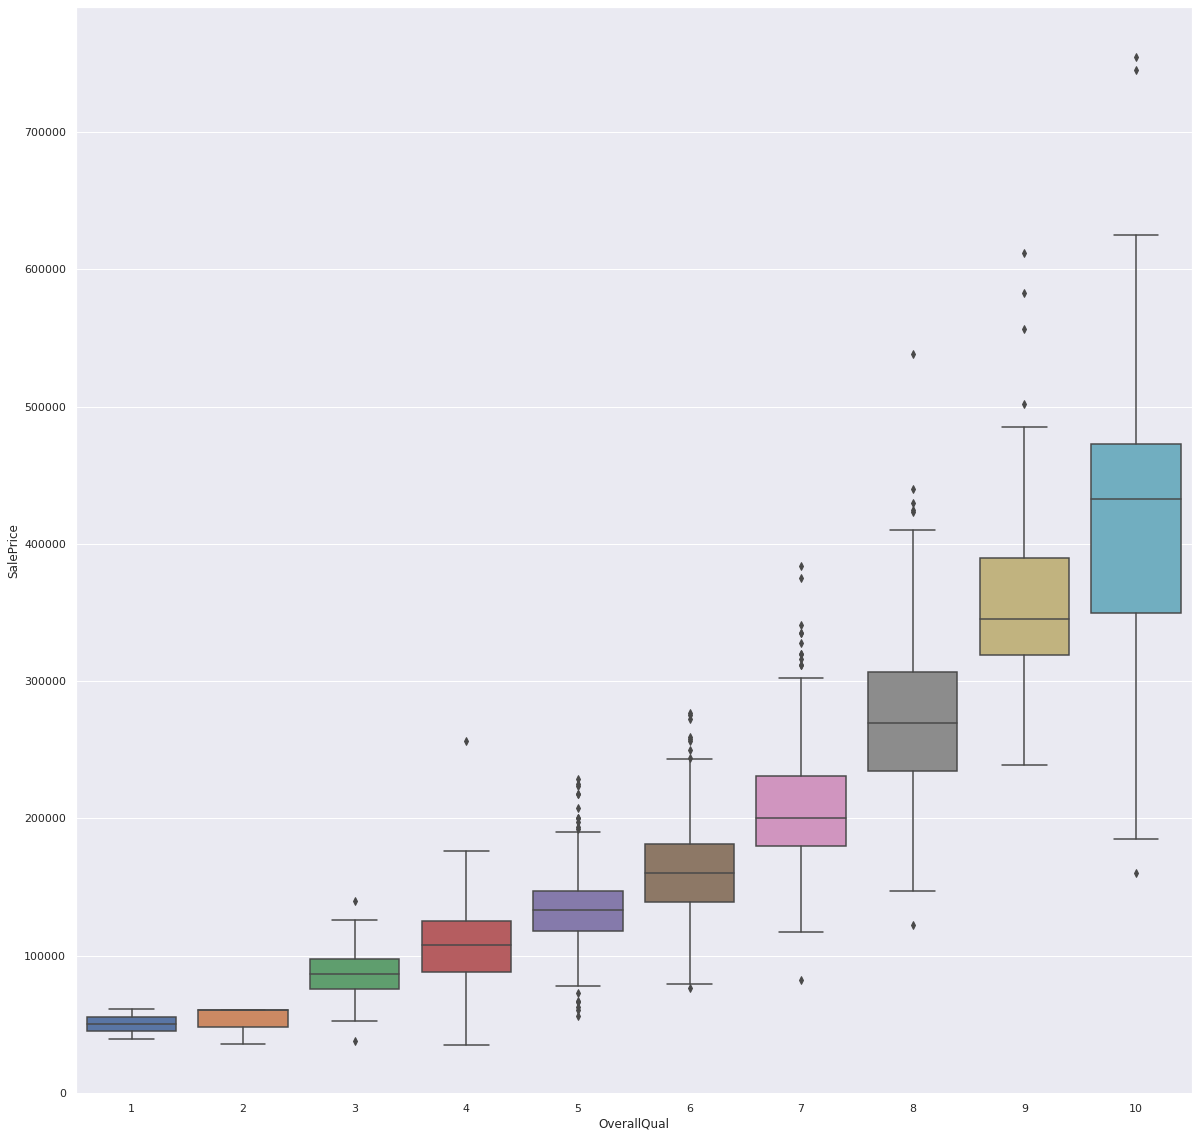

In [10]:
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

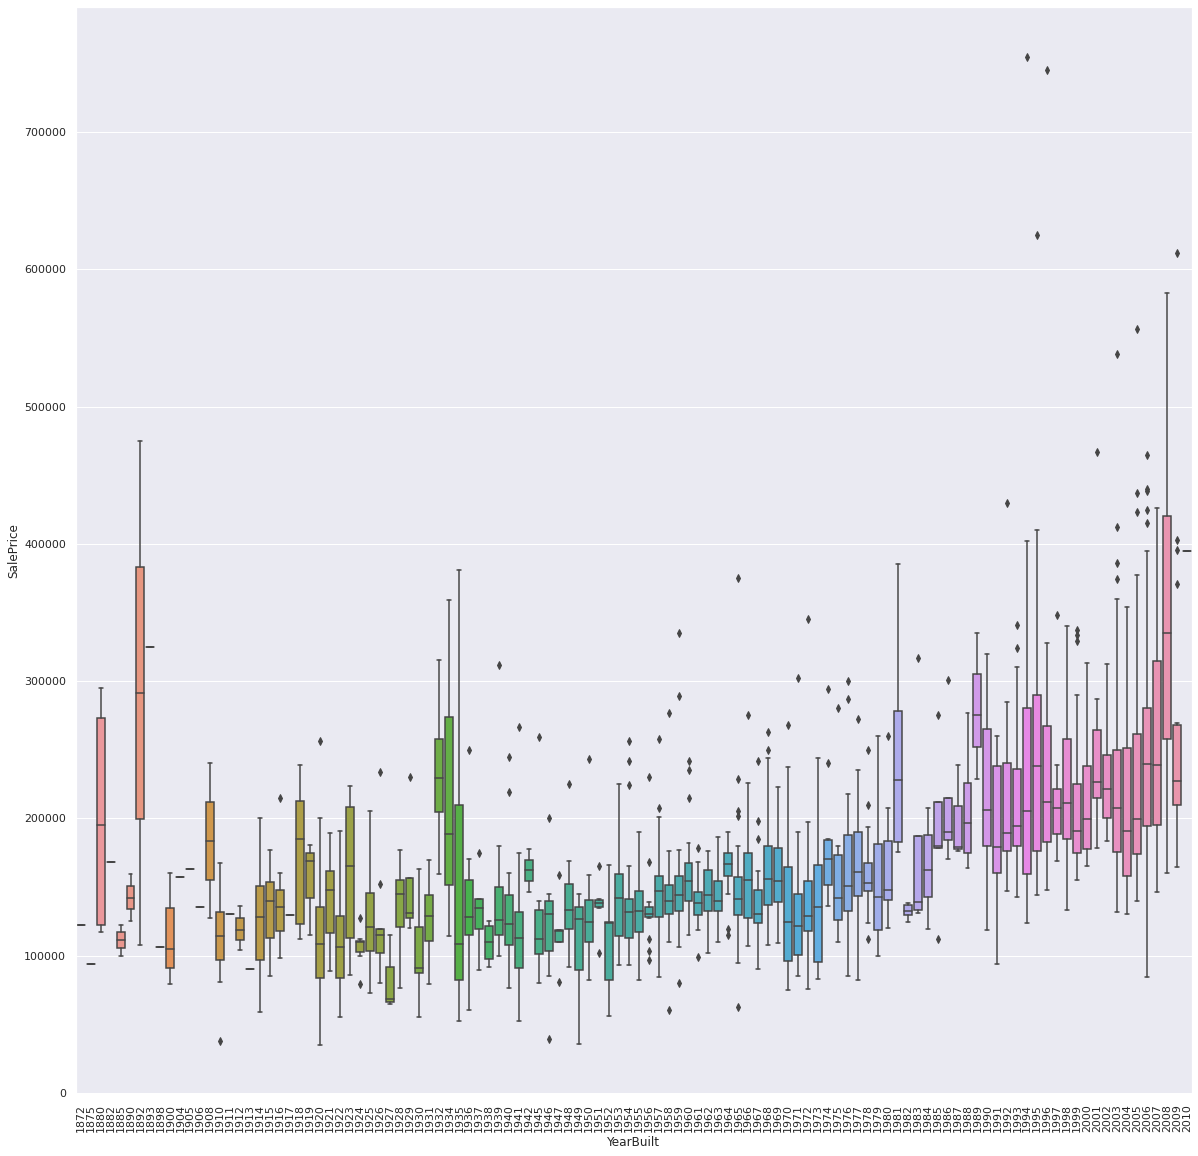

In [11]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize']=(20, 20)
plt.xticks(rotation=90)


sns.boxplot(x='YearBuilt', y='SalePrice', data=train_df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

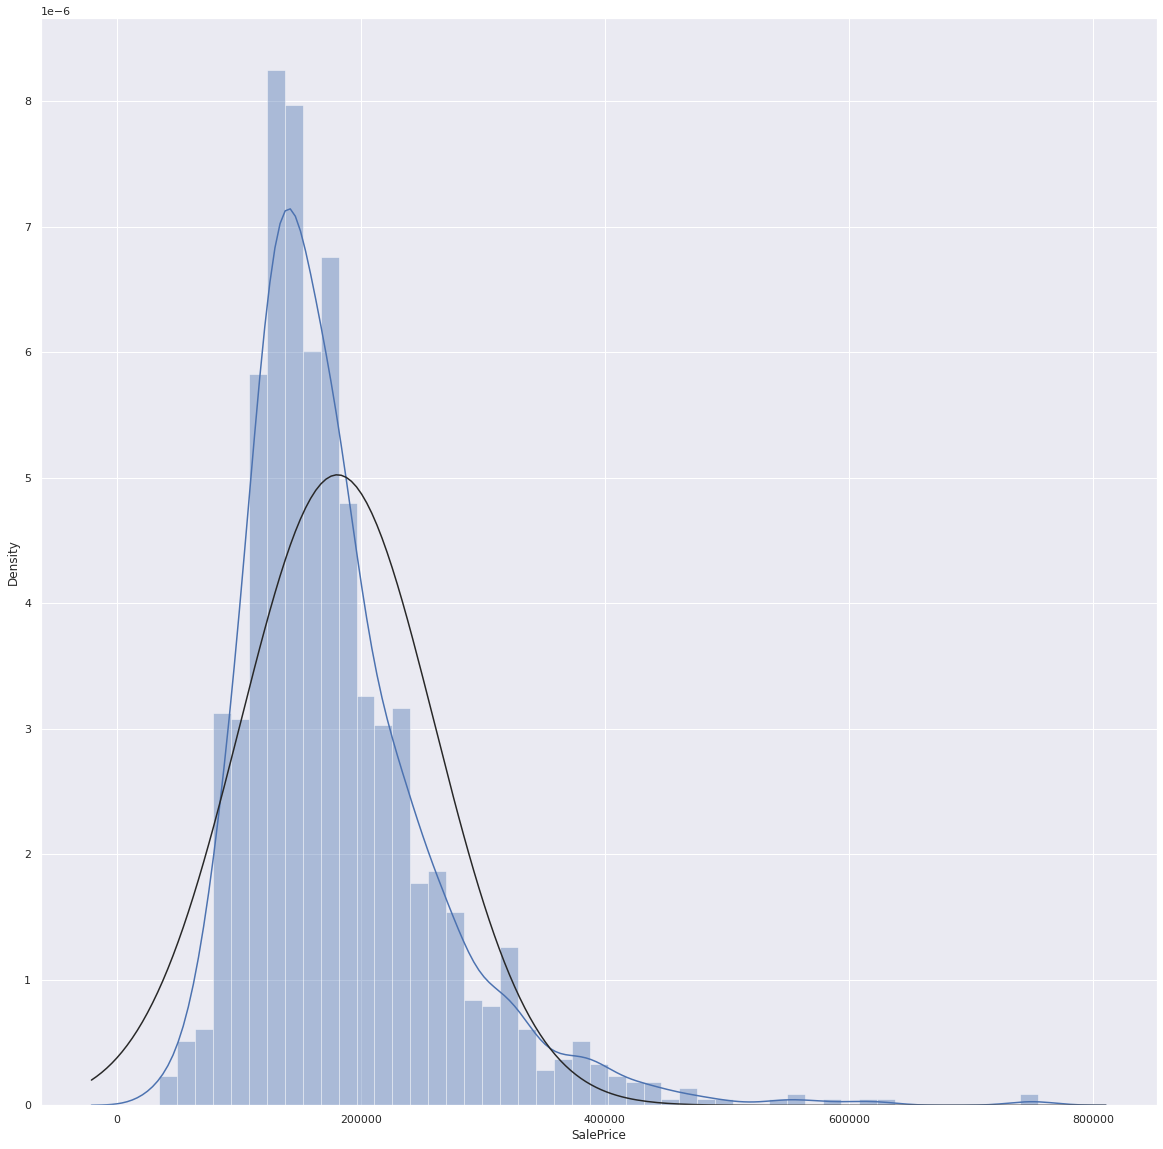

In [12]:
from scipy import stats
from scipy.stats import norm

sns.distplot(train_df['SalePrice'], fit=norm)

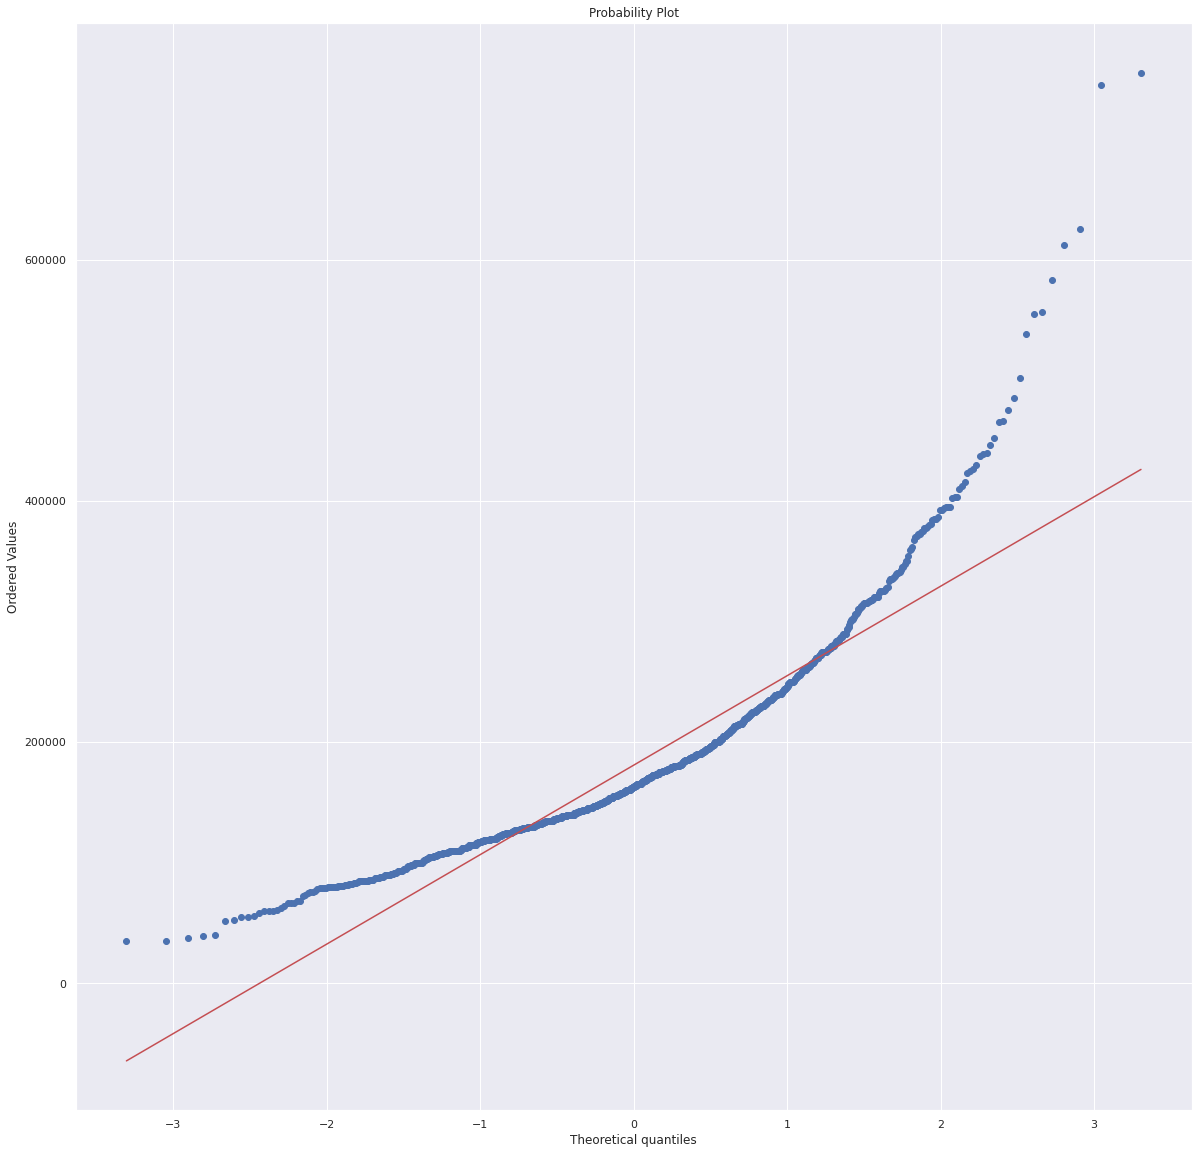

In [13]:
res = stats.probplot(train_df['SalePrice'], plot=plt)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

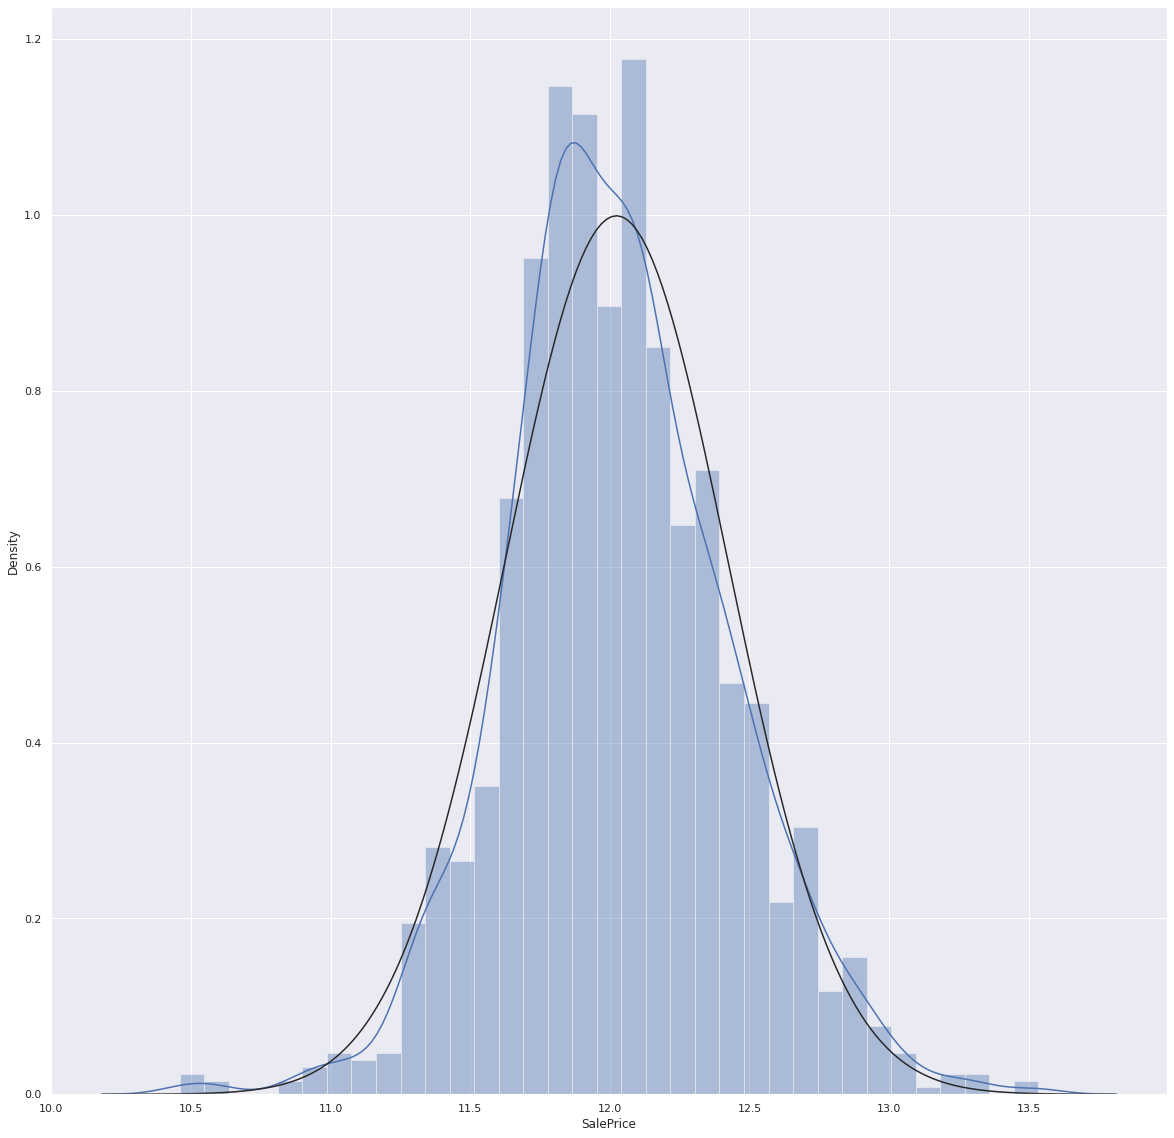

In [14]:
train_df['SalePrice'] = np.log(train_df['SalePrice'])

sns.distplot(train_df['SalePrice'], fit=norm)

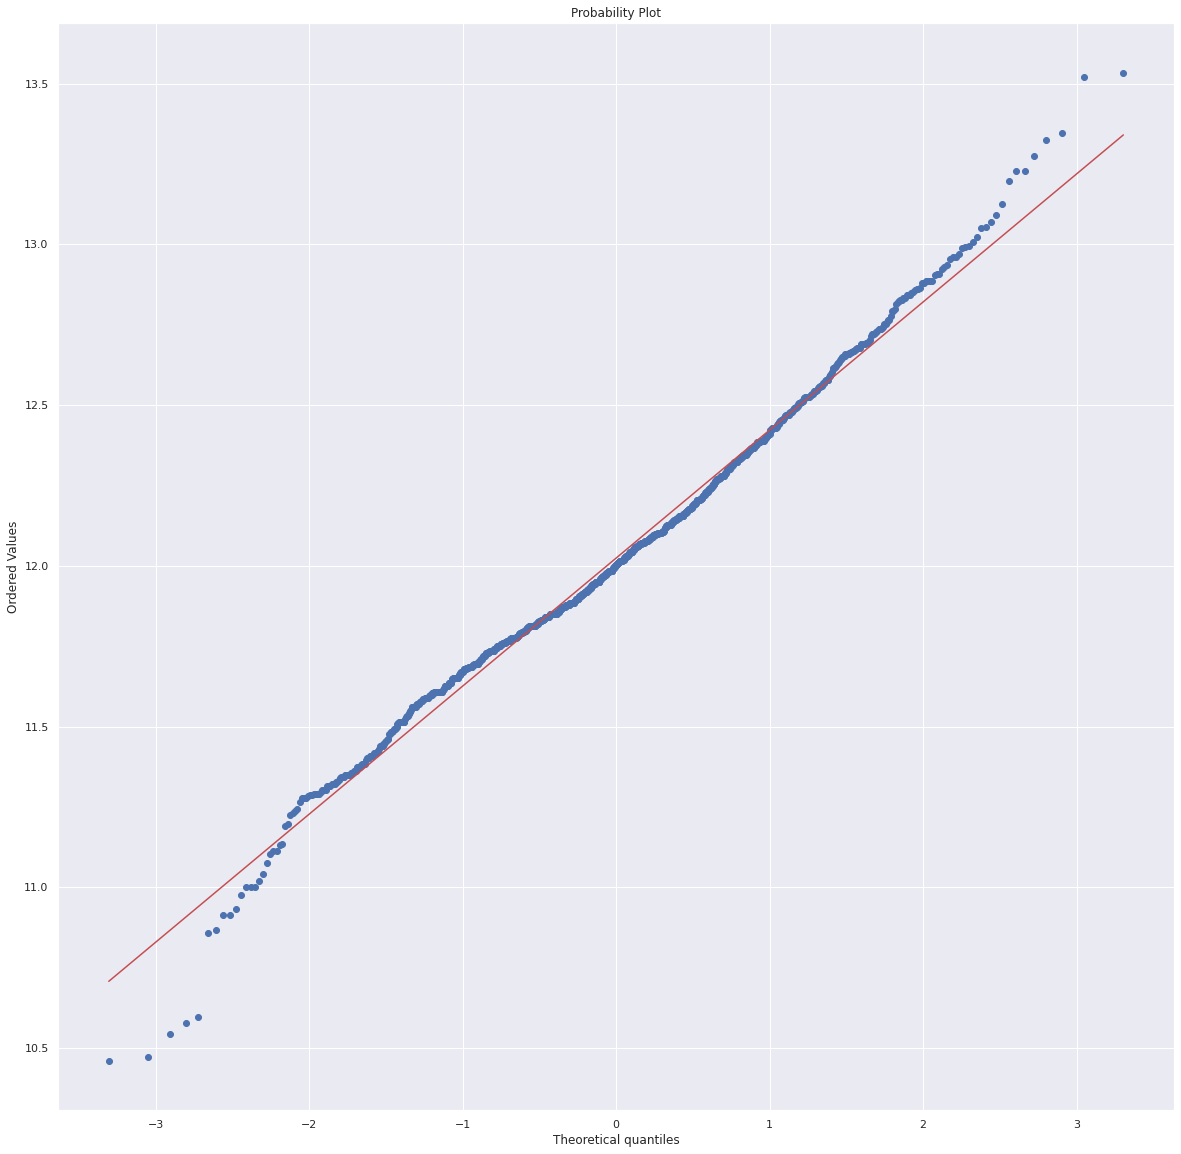

In [15]:
res = stats.probplot(train_df['SalePrice'], plot=plt)

### Check for missing values

In [16]:
train_df.isna().any().value_counts()

False    61
True     19
dtype: int64

- Out of 80 columns, missing values are present in 19.

In [17]:
missing_values_count = train_df.isnull().sum().sort_values(ascending=False)
missing_values_count.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

In [18]:
missing_value_percentage = round((train_df.isnull().sum().sort_values(ascending=False))*100 / len(train_df), 2)
missing_value_percentage.head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtCond         2.53
BsmtQual         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
MSSubClass       0.00
dtype: float64

- The features like PoolQC, MiscFeature, Alley, Fence, and FireplaceQu have a huge percentage of missing values. It does not make sense to recreate such huge percentage of data. Hence it is best to drop these columns.
- The rest of the columns with missing values can be treated with imputation techniques.
- We can also visualize the missing values with a heatmap

<AxesSubplot:ylabel='Id'>

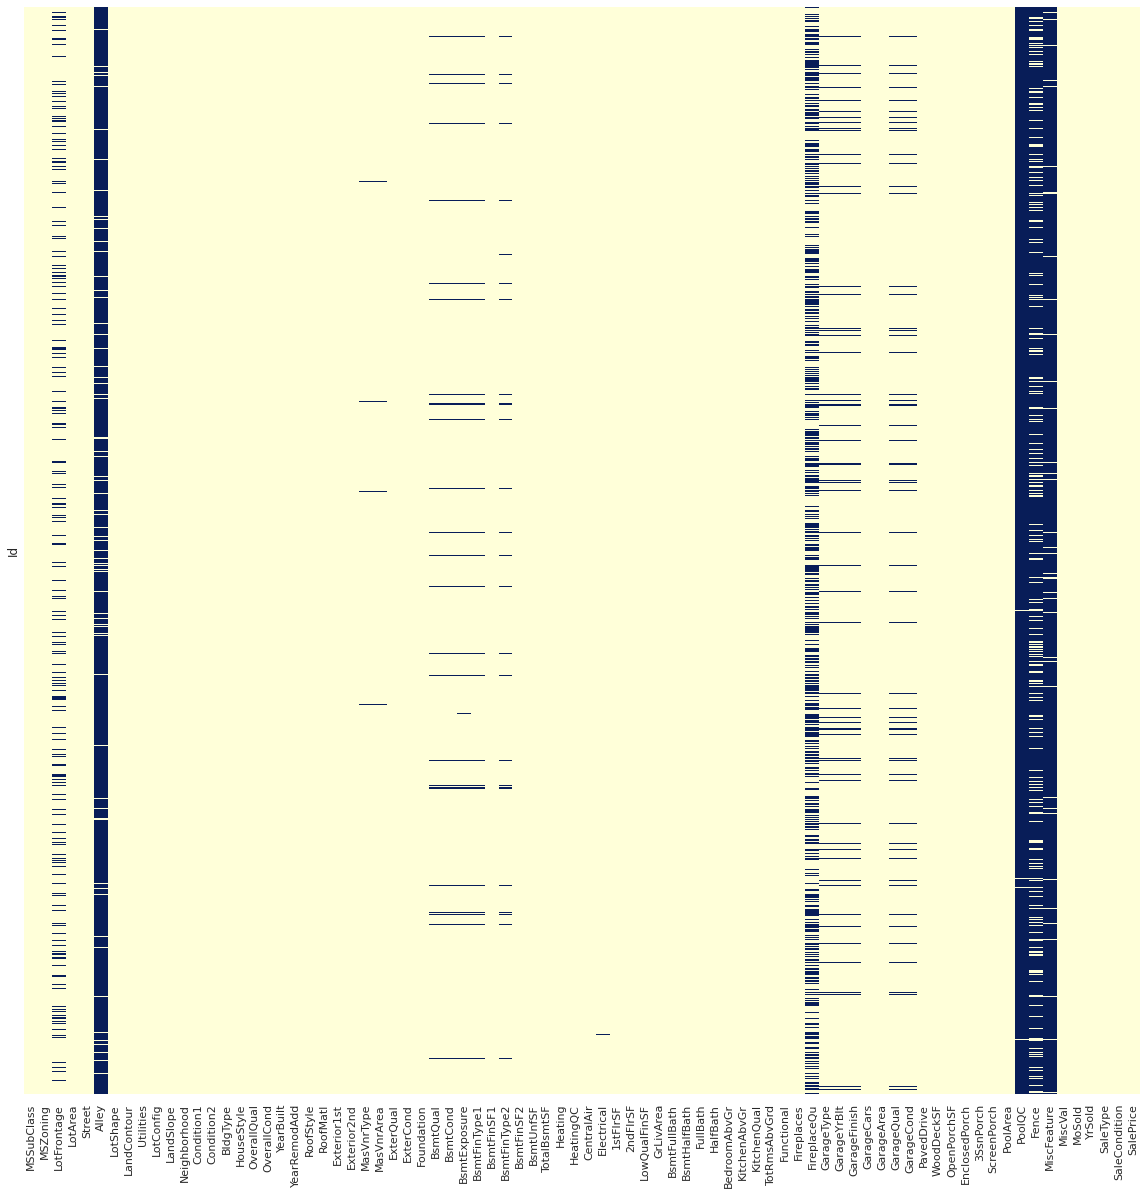

In [19]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20, 20)})

sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [20]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [21]:
train_df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])
train_df.shape

(1460, 75)

In [22]:
missing_value_percentage = round((train_df.isnull().sum().sort_values(ascending=False))*100 / len(train_df), 2)
missing_value_percentage.head(20)

LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
dtype: float64

In [23]:
mis_cols_list = ['LotFrontage', 'GarageType', 'GarageYrBlt', 
                 'GarageFinish', 'GarageQual', 'GarageCond', 
                'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 
                 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 
                 'MasVnrType', 'Electrical']

for column in mis_cols_list:
    print("The datatype for feature {}: ".format(column), train_df[column].dtype)

The datatype for feature LotFrontage:  float64
The datatype for feature GarageType:  object
The datatype for feature GarageYrBlt:  float64
The datatype for feature GarageFinish:  object
The datatype for feature GarageQual:  object
The datatype for feature GarageCond:  object
The datatype for feature BsmtFinType2:  object
The datatype for feature BsmtExposure:  object
The datatype for feature BsmtQual:  object
The datatype for feature BsmtCond:  object
The datatype for feature BsmtFinType1:  object
The datatype for feature MasVnrArea:  float64
The datatype for feature MasVnrType:  object
The datatype for feature Electrical:  object


In [24]:
for column in mis_cols_list:
    print("The number of unique values in column {}= ".format(column), train_df[column].nunique())

The number of unique values in column LotFrontage=  110
The number of unique values in column GarageType=  6
The number of unique values in column GarageYrBlt=  97
The number of unique values in column GarageFinish=  3
The number of unique values in column GarageQual=  5
The number of unique values in column GarageCond=  5
The number of unique values in column BsmtFinType2=  6
The number of unique values in column BsmtExposure=  4
The number of unique values in column BsmtQual=  4
The number of unique values in column BsmtCond=  4
The number of unique values in column BsmtFinType1=  6
The number of unique values in column MasVnrArea=  327
The number of unique values in column MasVnrType=  4
The number of unique values in column Electrical=  5


In [25]:
object_cols_fill = ['GarageType', 'GarageFinish', 'GarageQual', 
               'GarageCond', 'BsmtFinType2', 'BsmtExposure', 
               'BsmtQual', 'BsmtCond', 'BsmtFinType1', 
               'MasVnrType', 'Electrical']
numeric_cols_fill = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

for column in object_cols_fill:
    train_df[column] = train_df[column].fillna(train_df[column].mode()[0])
    
for column in numeric_cols_fill:
    train_df[column] = train_df[column].fillna(train_df[column].mean())

In [26]:
train_df.isnull().any().value_counts()

False    75
dtype: int64

## Import, Check and Treat the Test Dataset

In [27]:
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv', index_col=0)
print("Dimensions of the test dataset(Rows, Columns):", test_df.shape)

Dimensions of the test dataset(Rows, Columns): (1459, 79)


In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [29]:
test_df.isna().any().value_counts()

False    46
True     33
dtype: int64

- There are 33 columns with missing values.

<AxesSubplot:ylabel='Id'>

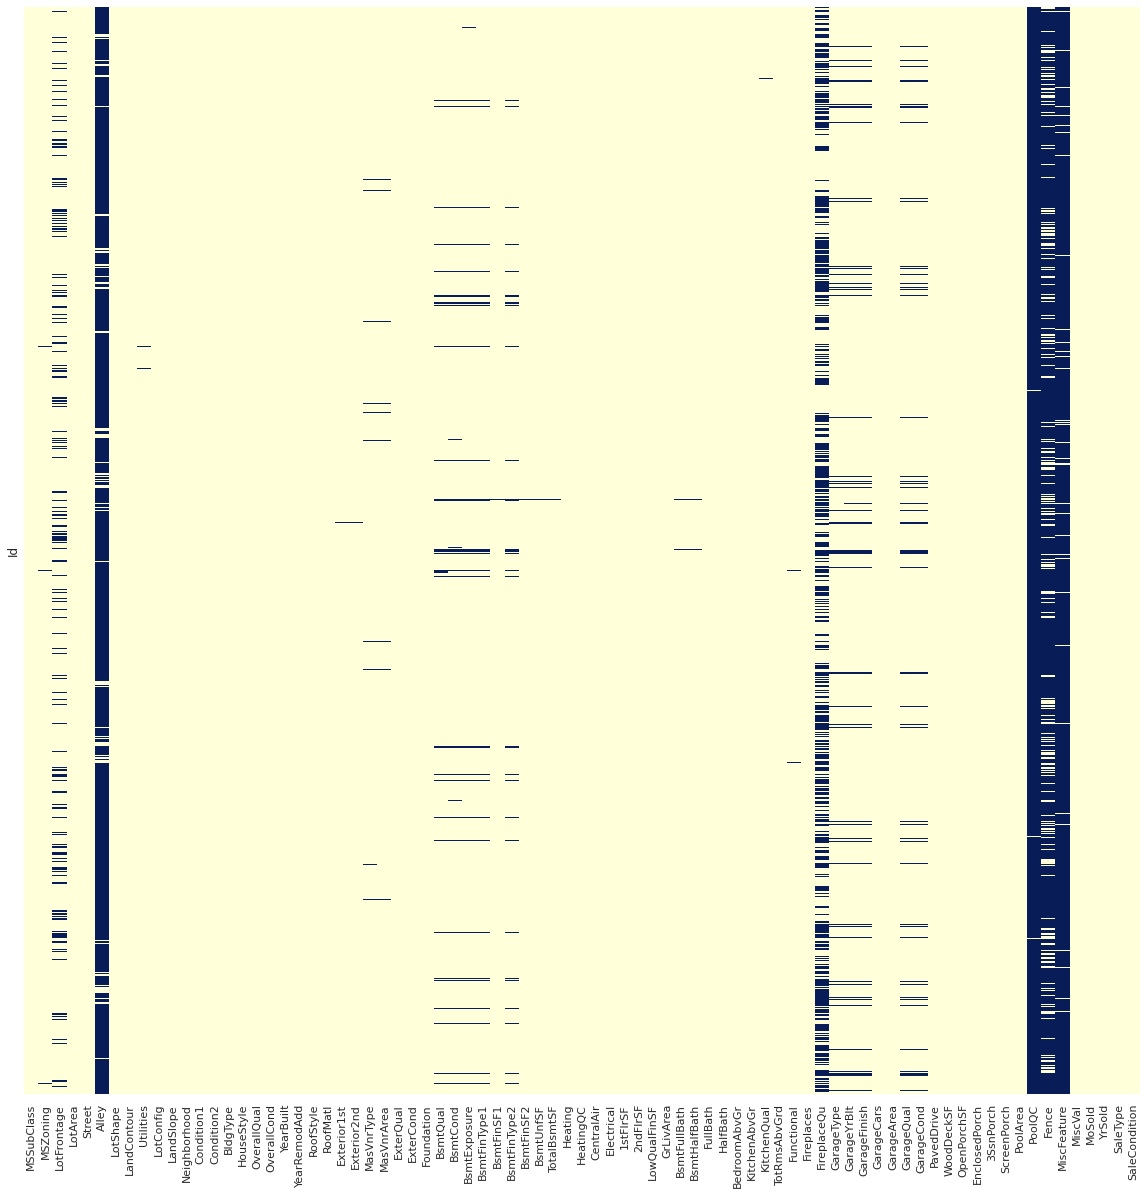

In [30]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [31]:
missing_values_count = test_df.isnull().sum().sort_values(ascending=False)
missing_values_count.head(35)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType2      42
BsmtFinType1      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
SaleType           1
BsmtFinSF1         1
GarageCars         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
GarageArea         1
BsmtFinSF2         1
TotRmsAbvGrd       0
KitchenAbvGr       0
dtype: int64

In [32]:
missing_values_percentage = round((test_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df), 2)
missing_values_percentage.head(35)

PoolQC          99.79
MiscFeature     96.50
Alley           92.67
Fence           80.12
FireplaceQu     50.03
LotFrontage     15.56
GarageYrBlt      5.35
GarageFinish     5.35
GarageQual       5.35
GarageCond       5.35
GarageType       5.21
BsmtCond         3.08
BsmtExposure     3.02
BsmtQual         3.02
BsmtFinType2     2.88
BsmtFinType1     2.88
MasVnrType       1.10
MasVnrArea       1.03
MSZoning         0.27
Functional       0.14
BsmtHalfBath     0.14
BsmtFullBath     0.14
Utilities        0.14
KitchenQual      0.07
SaleType         0.07
BsmtFinSF1       0.07
GarageCars       0.07
BsmtUnfSF        0.07
TotalBsmtSF      0.07
Exterior2nd      0.07
Exterior1st      0.07
GarageArea       0.07
BsmtFinSF2       0.07
TotRmsAbvGrd     0.00
KitchenAbvGr     0.00
dtype: float64

In [33]:
test_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [34]:
test_df = test_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

test_df.shape

(1459, 74)

In [35]:
missing_values_percentage = round((test_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df), 2)
missing_values_percentage.head(35)

LotFrontage     15.56
GarageCond       5.35
GarageYrBlt      5.35
GarageFinish     5.35
GarageQual       5.35
GarageType       5.21
BsmtCond         3.08
BsmtExposure     3.02
BsmtQual         3.02
BsmtFinType1     2.88
BsmtFinType2     2.88
MasVnrType       1.10
MasVnrArea       1.03
MSZoning         0.27
Functional       0.14
BsmtHalfBath     0.14
Utilities        0.14
BsmtFullBath     0.14
BsmtFinSF1       0.07
BsmtFinSF2       0.07
BsmtUnfSF        0.07
TotalBsmtSF      0.07
KitchenQual      0.07
Exterior2nd      0.07
Exterior1st      0.07
GarageArea       0.07
SaleType         0.07
GarageCars       0.07
MoSold           0.00
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
TotRmsAbvGrd     0.00
YrSold           0.00
dtype: float64

In [36]:
mis_cols_list = ['LotFrontage', 'GarageCond', 'GarageYrBlt', 
                 'GarageFinish', 'GarageQual', 'GarageType', 
                 'BsmtCond', 'BsmtExposure', 'BsmtQual', 
                 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType',
                 'MasVnrArea', 'MSZoning', 'Functional', 
                 'BsmtHalfBath', 'Utilities', 'BsmtFullBath', 
                 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                 'TotalBsmtSF', 'KitchenQual', 'Exterior2nd', 
                'Exterior1st', 'GarageArea', 'SaleType', 
                 'GarageCars']

for column in mis_cols_list:
    print("The datatype of the column {} = ".format(column), test_df[column].dtype)    

The datatype of the column LotFrontage =  float64
The datatype of the column GarageCond =  object
The datatype of the column GarageYrBlt =  float64
The datatype of the column GarageFinish =  object
The datatype of the column GarageQual =  object
The datatype of the column GarageType =  object
The datatype of the column BsmtCond =  object
The datatype of the column BsmtExposure =  object
The datatype of the column BsmtQual =  object
The datatype of the column BsmtFinType1 =  object
The datatype of the column BsmtFinType2 =  object
The datatype of the column MasVnrType =  object
The datatype of the column MasVnrArea =  float64
The datatype of the column MSZoning =  object
The datatype of the column Functional =  object
The datatype of the column BsmtHalfBath =  float64
The datatype of the column Utilities =  object
The datatype of the column BsmtFullBath =  float64
The datatype of the column BsmtFinSF1 =  float64
The datatype of the column BsmtFinSF2 =  float64
The datatype of the column

In [37]:
for column in mis_cols_list:
    print("The number of unique values in column {}= ".format(column), test_df[column].nunique())

The number of unique values in column LotFrontage=  115
The number of unique values in column GarageCond=  5
The number of unique values in column GarageYrBlt=  97
The number of unique values in column GarageFinish=  3
The number of unique values in column GarageQual=  4
The number of unique values in column GarageType=  6
The number of unique values in column BsmtCond=  4
The number of unique values in column BsmtExposure=  4
The number of unique values in column BsmtQual=  4
The number of unique values in column BsmtFinType1=  6
The number of unique values in column BsmtFinType2=  6
The number of unique values in column MasVnrType=  4
The number of unique values in column MasVnrArea=  303
The number of unique values in column MSZoning=  5
The number of unique values in column Functional=  7
The number of unique values in column BsmtHalfBath=  3
The number of unique values in column Utilities=  1
The number of unique values in column BsmtFullBath=  4
The number of unique values in col

In [38]:
print("Unique values in 'BsmtHalfBath': \n", test_df['BsmtHalfBath'].unique())
print("Unique values in 'GarageCars': \n", test_df['GarageCars'].unique())

Unique values in 'BsmtHalfBath': 
 [ 0.  1. nan  2.]
Unique values in 'GarageCars': 
 [ 1.  2.  3.  0.  4.  5. nan]


- The columns 'BsmtHalfBath' and 'GarageCars' are categorical in nature. However it has been identified as float64. We can convert the column to object dtype.

In [39]:
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].astype('object')
test_df['GarageCars'] = test_df['GarageCars'].astype('object')

print("Datatype of 'BsmtHalfBath': ", test_df['BsmtHalfBath'].dtype)
print("Datatype of 'GarageCars': ", test_df['GarageCars'].dtype)

Datatype of 'BsmtHalfBath':  object
Datatype of 'GarageCars':  object


In [40]:
for column in mis_cols_list:
    print("The datatype of the column {} = ".format(column), test_df[column].dtype)  

The datatype of the column LotFrontage =  float64
The datatype of the column GarageCond =  object
The datatype of the column GarageYrBlt =  float64
The datatype of the column GarageFinish =  object
The datatype of the column GarageQual =  object
The datatype of the column GarageType =  object
The datatype of the column BsmtCond =  object
The datatype of the column BsmtExposure =  object
The datatype of the column BsmtQual =  object
The datatype of the column BsmtFinType1 =  object
The datatype of the column BsmtFinType2 =  object
The datatype of the column MasVnrType =  object
The datatype of the column MasVnrArea =  float64
The datatype of the column MSZoning =  object
The datatype of the column Functional =  object
The datatype of the column BsmtHalfBath =  object
The datatype of the column Utilities =  object
The datatype of the column BsmtFullBath =  float64
The datatype of the column BsmtFinSF1 =  float64
The datatype of the column BsmtFinSF2 =  float64
The datatype of the column 

In [41]:
object_cols_fill =  ['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 
                     'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 
                     'BsmtFinType2', 'MasVnrType', 'MSZoning', 'Functional', 
                     'BsmtHalfBath', 'Utilities', 'KitchenQual', 'Exterior2nd', 
                     'Exterior1st', 'SaleType', 'GarageCars']
numeric_cols_fill = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 
                     'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']

for column in object_cols_fill:
    test_df[column] = test_df[column].fillna(test_df[column].mode()[0])
    
for column in numeric_cols_fill:
    test_df[column] = test_df[column].fillna(test_df[column].mean())

In [42]:
test_df.isnull().any().value_counts()

False    74
dtype: int64

In [43]:
train_df.shape, test_df.shape

((1460, 75), (1459, 74))

In [44]:
combined_df = pd.concat([train_df, test_df], axis=0)
combined_df.shape

(2919, 75)

In [45]:
numerical_df = combined_df.select_dtypes(include=['int64', 'float64'])
categorical_df = combined_df.select_dtypes(include='object')

numerical_df.shape, categorical_df.shape

((2919, 37), (2919, 38))

In [46]:
numerical_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [47]:
numerical_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.315409,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.197711,441.422475,49.583289,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,12.024051
std,42.517628,21.314457,7886.996359,1.409947,1.113131,30.291442,20.894344,178.626137,455.532752,169.176625,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,0.399452
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,11.775097
50%,50.000000,69.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,369.000000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001505
75%,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273731
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,13.534473


In [48]:
categorical_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_dummy_df = categorical_df.apply(le.fit_transform)
categorical_dummy_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
2,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
3,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
4,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
5,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4


In [50]:
clean_df = pd.concat([numerical_df, categorical_dummy_df], axis=1)
clean_df.shape

(2919, 75)

In [51]:
df_train = clean_df.iloc[:1460, :]
df_test = clean_df.iloc[1460:, :]

df_train.shape, df_test.shape

((1460, 75), (1459, 75))

In [52]:
df_test['SalePrice'].unique()

array([nan])

In [53]:
df_test.drop(['SalePrice'], axis=1, inplace=True)
df_test.shape

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(1459, 74)

## Perform Test-Train Split

In [54]:
X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']

## Build Model - Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

LinearRegression_model = lr.fit(X, y)
LinearRegression_model.score(X, y)

0.886837662355571

In [56]:
'''import pickle
filename = 'saved_linear_regression_model'
pickle.dump(LinearRegression_model, open(filename, 'wb'))'''

"import pickle\nfilename = 'saved_linear_regression_model'\npickle.dump(LinearRegression_model, open(filename, 'wb'))"

In [57]:
y_test_pred_lr = LinearRegression_model.predict(df_test)
y_test_pred_lr

array([11.66432074, 11.91173886, 12.02368949, ..., 11.94669581,
       11.70617345, 12.40263612])

In [58]:
'''prediction_df = pd.DataFrame(y_test_pred_lr)
sample_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission_df = pd.concat([sample_df['Id'], prediction_df], axis=1)
submission_df.columns  = ['Id', 'SalePrice']
submission_df.to_csv('sample_submission.csv', index=False)'''

"prediction_df = pd.DataFrame(y_test_pred_lr)\nsample_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')\nsubmission_df = pd.concat([sample_df['Id'], prediction_df], axis=1)\nsubmission_df.columns  = ['Id', 'SalePrice']\nsubmission_df.to_csv('sample_submission.csv', index=False)"

## Build Model - Random Forest Regression

In [59]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor()

rand_fst_reg_model = RF_reg.fit(X, y)
rand_fst_reg_model.score(X, y)

0.9827148753721837

In [60]:
y_test_pred_rfr = rand_fst_reg_model.predict(df_test)
y_test_pred_rfr

array([11.74130557, 11.92871958, 12.08303479, ..., 11.921502  ,
       11.65721409, 12.37129655])

In [61]:
'''prediction_df = pd.DataFrame(y_test_pred_rfr)
sample_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission_df = pd.concat([sample_df['Id'], prediction_df], axis=1)
submission_df.columns  = ['Id', 'SalePrice']
submission_df.to_csv('sample_submission.csv', index=False)'''

"prediction_df = pd.DataFrame(y_test_pred_rfr)\nsample_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')\nsubmission_df = pd.concat([sample_df['Id'], prediction_df], axis=1)\nsubmission_df.columns  = ['Id', 'SalePrice']\nsubmission_df.to_csv('sample_submission.csv', index=False)"

## Build Model - ANN

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

model = Sequential()

model.add(Dense(units=128, activation=tf.nn.relu, input_shape=(X.shape[1], )))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation=tf.nn.relu))
model.add(Dense(units=1, kernel_initializer='normal', activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               9600      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 19,969
Trainable params: 19,969
Non-trainable params: 0
____________________________________________________

2022-03-29 06:46:53.833462: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [63]:
model.compile(optimizer='adam', loss=tf.keras.losses.msle, metrics=['msle'])
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

2022-03-29 06:46:54.615995: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
37/37 [==============================] - 1s 9ms/step - loss: 6.5861 - msle: 6.5861 - val_loss: 6.5904 - val_msle: 6.5904
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 6.5727 - msle: 6.5727 - val_loss: 6.5904 - val_msle: 6.5904
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 6.5807 - msle: 6.5807 - val_loss: 6.5904 - val_msle: 6.5904
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 6.5861 - msle: 6.5861 - val_loss: 6.5904 - val_msle: 6.5904
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 6.5861 - msle: 6.5861 - val_loss: 6.5904 - val_msle: 6.5904
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 6.5861 - msle: 6.5861 - val_loss: 6.5904 - val_msle: 6.5904
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 6.5806 - msle: 6.5806 - val_loss: 6.5904 - val_msle: 6.5904
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - lo

In [64]:
y_test_pred_ann = model.predict(df_test)
y_test_pred_ann

array([[ -707.6753 ],
       [-1180.7489 ],
       [ -843.4852 ],
       ...,
       [-1184.7949 ],
       [ -656.4195 ],
       [ -626.85187]], dtype=float32)

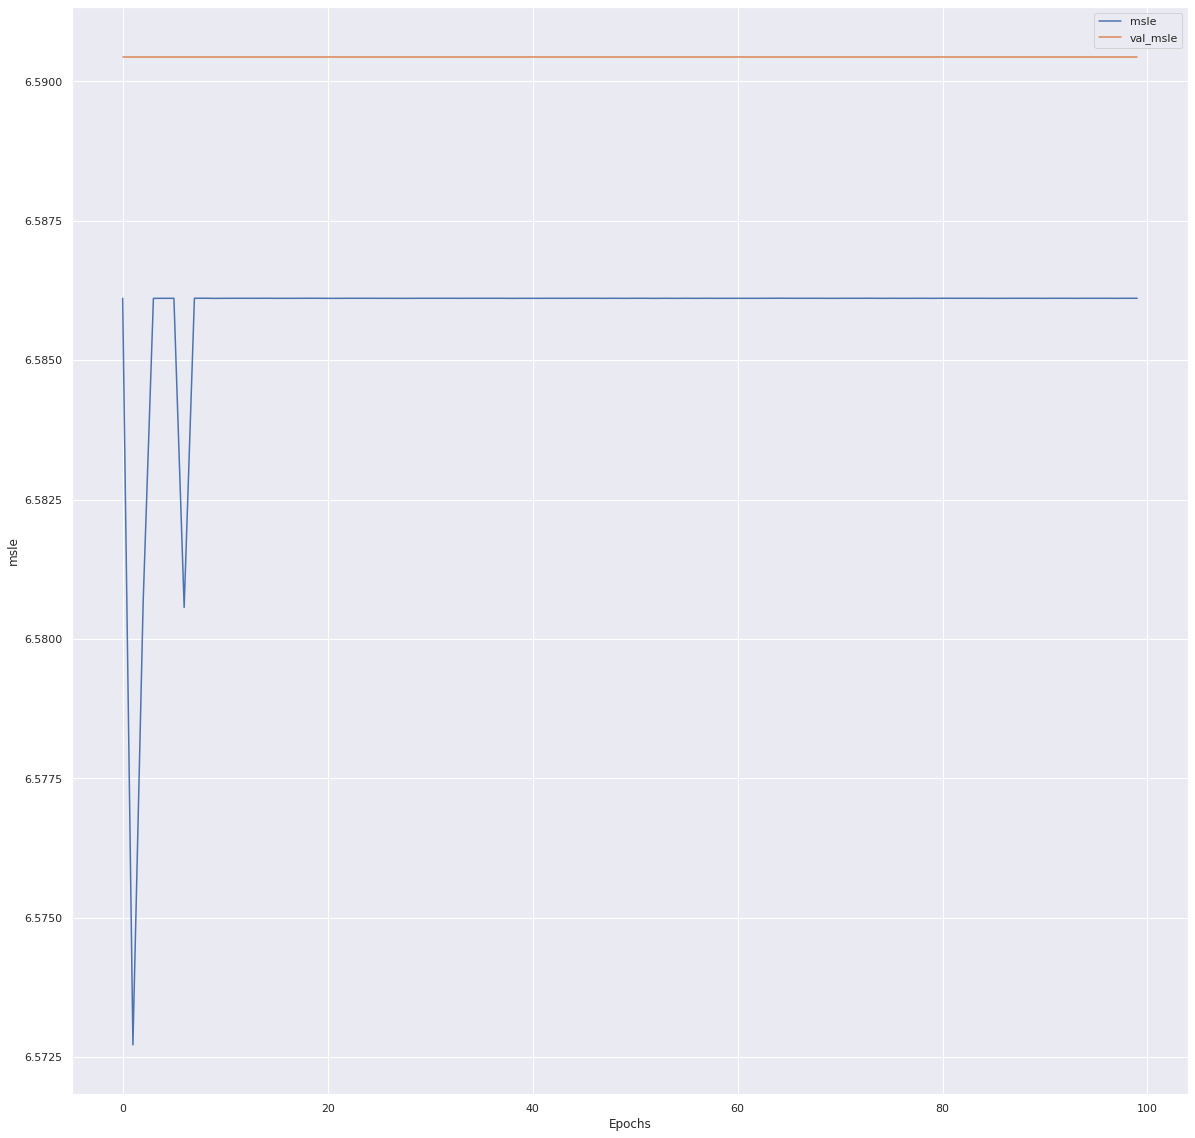

In [65]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'msle')

In [66]:
'''prediction_df = pd.DataFrame(y_test_pred_ann)
sample_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission_df = pd.concat([sample_df['Id'], prediction_df], axis=1)
submission_df.columns  = ['Id', 'SalePrice']
submission_df.to_csv('sample_submission.csv', index=False)'''

"prediction_df = pd.DataFrame(y_test_pred_ann)\nsample_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')\nsubmission_df = pd.concat([sample_df['Id'], prediction_df], axis=1)\nsubmission_df.columns  = ['Id', 'SalePrice']\nsubmission_df.to_csv('sample_submission.csv', index=False)"

## Lasso Regression

In [67]:
from sklearn.linear_model import Lasso, Ridge

ls = Lasso()
lasso_model = ls.fit(X, y)
lasso_model.score(X, y)

0.7674167060729491

In [68]:
ls_pred = ls.predict(df_test)
ls_pred

array([11.8601604 , 11.94832421, 12.16457968, ..., 12.08594628,
       11.69206852, 12.3368879 ])

In [69]:
'''prediction_df = pd.DataFrame(ls_pred)
sample_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission_df = pd.concat([sample_df['Id'], prediction_df], axis=1)
submission_df.columns  = ['Id', 'SalePrice']
submission_df.to_csv('sample_submission.csv', index=False)'''

"prediction_df = pd.DataFrame(ls_pred)\nsample_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')\nsubmission_df = pd.concat([sample_df['Id'], prediction_df], axis=1)\nsubmission_df.columns  = ['Id', 'SalePrice']\nsubmission_df.to_csv('sample_submission.csv', index=False)"

## Ridge Regression

In [70]:
rd = Ridge()
rd_model = rd.fit(X, y)
rd_model.score(X, y)

0.8867863211258923

In [71]:
rd_pred = rd_model.predict(df_test)
rd_pred

array([11.66376055, 11.90968136, 12.02462042, ..., 11.94669699,
       11.70577388, 12.40283368])

In [72]:
'''prediction_df = pd.DataFrame(rd_pred)
sample_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission_df = pd.concat([sample_df['Id'], prediction_df], axis=1)
submission_df.columns  = ['Id', 'SalePrice']
submission_df.to_csv('sample_submission.csv', index=False)'''

"prediction_df = pd.DataFrame(rd_pred)\nsample_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')\nsubmission_df = pd.concat([sample_df['Id'], prediction_df], axis=1)\nsubmission_df.columns  = ['Id', 'SalePrice']\nsubmission_df.to_csv('sample_submission.csv', index=False)"

## ElasticNet Regression

In [73]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(random_state=0)
elasticnet_model = regr.fit(X, y)
elasticnet_model.score(X, y)

0.7872854949928276

In [74]:
y_pred_elastic = elasticnet_model.predict(df_test)
y_pred_elastic

array([11.85293686, 11.89981666, 12.19221816, ..., 12.10348632,
       11.71942204, 12.3488808 ])

In [75]:
'''prediction_df = pd.DataFrame(y_pred_elastic)
sample_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission_df = pd.concat([sample_df['Id'], prediction_df], axis=1)
submission_df.columns  = ['Id', 'SalePrice']
submission_df.to_csv('sample_submission.csv', index=False)'''

"prediction_df = pd.DataFrame(y_pred_elastic)\nsample_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')\nsubmission_df = pd.concat([sample_df['Id'], prediction_df], axis=1)\nsubmission_df.columns  = ['Id', 'SalePrice']\nsubmission_df.to_csv('sample_submission.csv', index=False)"

## Bayesian Ridge Regression

In [76]:
from sklearn.linear_model import BayesianRidge
brr = BayesianRidge()

bay_rid_reg_model = brr.fit(X, y)
bay_rid_reg_model.score(X, y)

0.884696666707346

In [77]:
y_pred_brr = bay_rid_reg_model.predict(df_test)
y_pred_brr

array([11.69274368, 11.88078973, 12.04007696, ..., 11.95931483,
       11.71257318, 12.3921572 ])

In [78]:
'''prediction_df = pd.DataFrame(y_pred_brr)
sample_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission_df = pd.concat([sample_df['Id'], prediction_df], axis=1)
submission_df.columns  = ['Id', 'SalePrice']
submission_df.to_csv('sample_submission.csv', index=False)'''

"prediction_df = pd.DataFrame(y_pred_brr)\nsample_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')\nsubmission_df = pd.concat([sample_df['Id'], prediction_df], axis=1)\nsubmission_df.columns  = ['Id', 'SalePrice']\nsubmission_df.to_csv('sample_submission.csv', index=False)"

## Build Model - Stochastic Gradient Descent - SGD

In [79]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler

reg_std = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
sgd_model_std = reg_std.fit(X, y)

In [80]:
y_pred_sgd = sgd_model_std.predict(df_test)
y_pred_sgd

array([11.61306967, 11.89713466, 12.00145632, ..., 11.95028419,
       11.70473464, 12.43769092])

In [81]:
sgd_model_std.score(X, y)

0.8806267266592497